In [5]:
from math import sqrt

import pandas as pd
from matplotlib import rcParams, pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

rcParams['figure.figsize'] = [12, 8]
rcParams['figure.dpi'] = 200

In [6]:
df = pd.read_csv('data/british airways.csv',
                 skiprows=1,
                 names=['ds', 'y'],
                 parse_dates=['ds'],
                 dtype={'y': float})

In [7]:
train_data, test_data = train_test_split(df, test_size=0.1, shuffle=False)

In [8]:
result = pd.DataFrame(columns=['Change points', 'RMSE'])
for change_points in range(30):
    model = Prophet(n_changepoints=change_points)
    model.fit(train_data)
    future = model.make_future_dataframe(periods=len(test_data) + 1, freq='M')
    forecast = model.predict(future)

    rmse = sqrt(mean_squared_error(forecast[-len(test_data):]['yhat'], test_data['y']))
    result.loc[len(result)] = [change_points, rmse]

result

19:50:56 - cmdstanpy - INFO - Chain [1] start processing
19:50:56 - cmdstanpy - INFO - Chain [1] done processing
19:50:57 - cmdstanpy - INFO - Chain [1] start processing
19:50:57 - cmdstanpy - INFO - Chain [1] done processing
19:50:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:50:57 - cmdstanpy - INFO - Chain [1] start processing
19:50:57 - cmdstanpy - INFO - Chain [1] done processing
19:50:57 - cmdstanpy - INFO - Chain [1] start processing
19:50:57 - cmdstanpy - INFO - Chain [1] done processing
19:50:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:50:57 - cmdstanpy - INFO - Chain [1] start processing
19:50:57 - cmdstanpy - INFO - Chain [1] done processing
19:50:57 - cmdstanpy - INFO - Chain [1] start processing
19:50:57 - cmdstanpy - INFO - Chain [1] done processing
19:50:57 - cmd

,Change points,RMSE
0,0.0,3166.080531
1,1.0,3168.559417
2,2.0,2702.131228
3,3.0,2516.385368
4,4.0,2685.020535
5,5.0,2563.731036
6,6.0,2547.150657
7,7.0,2554.645102
8,8.0,2556.512019
9,9.0,2510.817632


In [9]:
model = Prophet(n_changepoints=9)
model.fit(train_data)

19:50:58 - cmdstanpy - INFO - Chain [1] start processing
19:50:58 - cmdstanpy - INFO - Chain [1] done processing


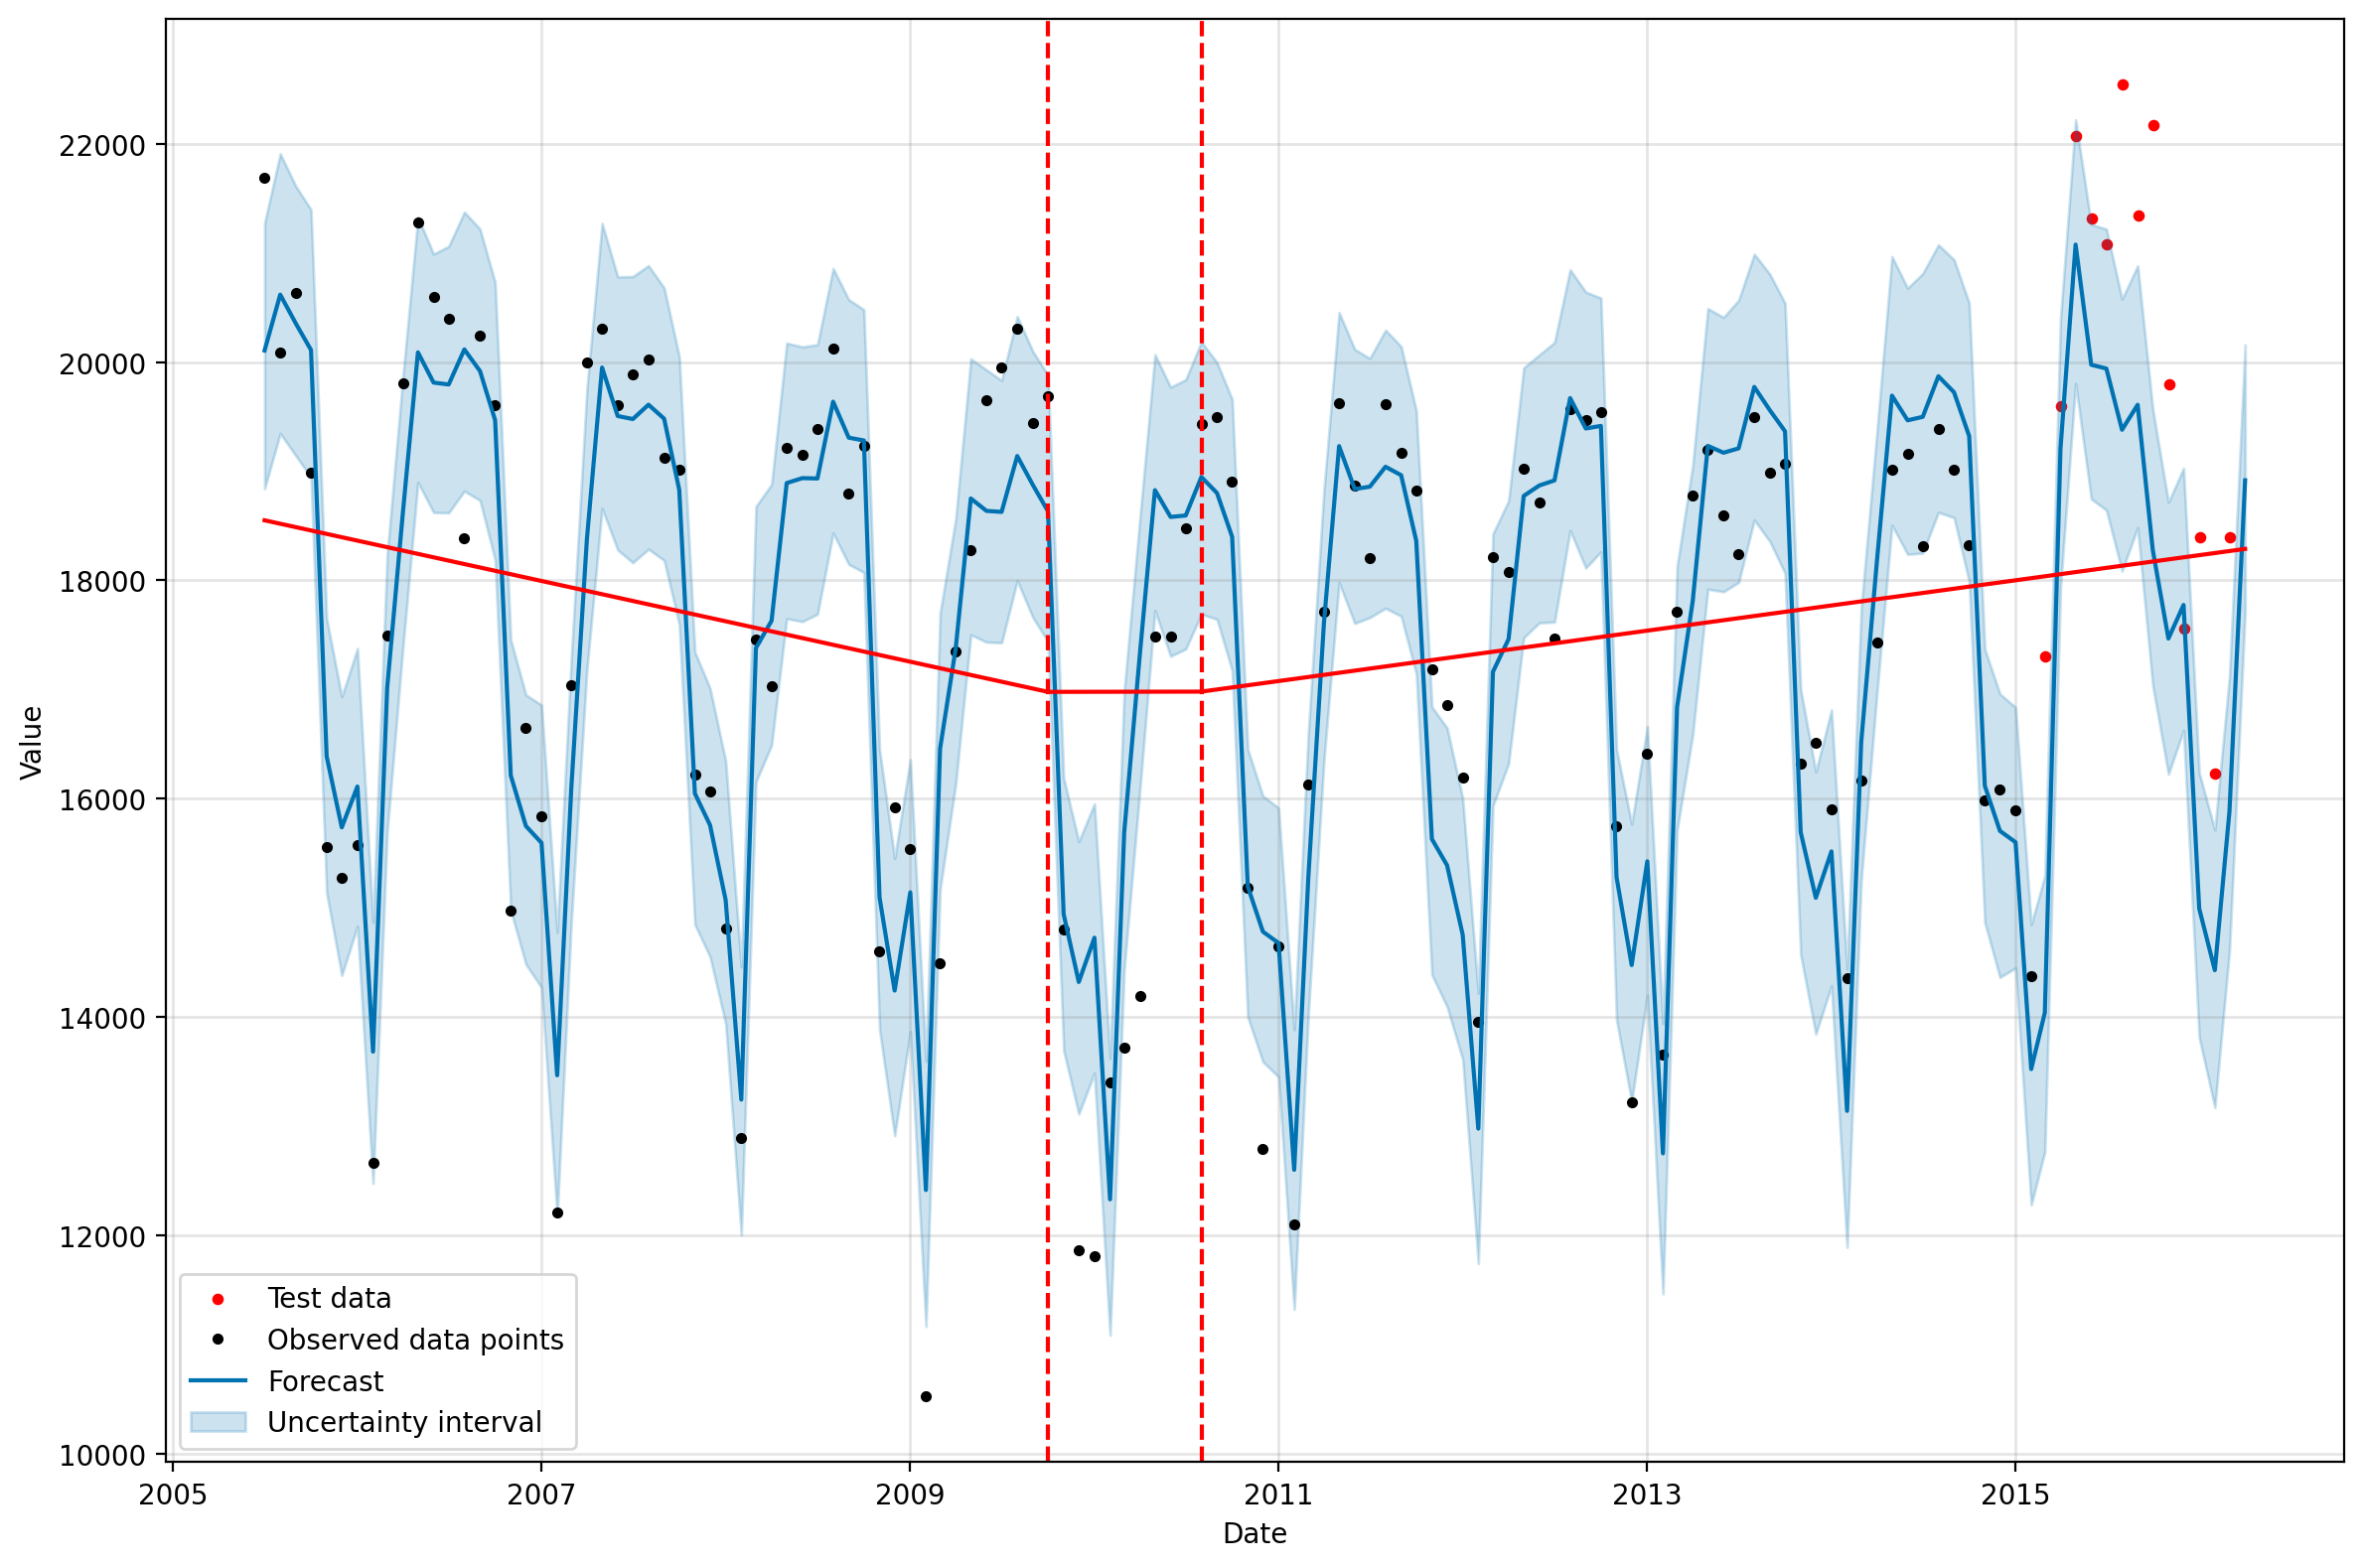

In [10]:
future = model.make_future_dataframe(periods=len(test_data) + 1, freq='M')
forecast = model.predict(future)

_, ax = plt.subplots()
ax.scatter(test_data['ds'], test_data['y'], color='red', label='Test data', s=10)
fig = model.plot(forecast, ax=ax, uncertainty=True, plot_cap=True, xlabel='Date', ylabel='Value')
a = add_changepoints_to_plot(fig.gca(), model, forecast)
plt.legend()
plt.show()